In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.074033,1.726366,0.801871,-0.173530,0.449183,0.294101,-0.852587,0.322264,0.321293,-0.103499,-0.107474,-0.1771,-0.292539,-1.051878,1.704733,-2.246315,6
1,-0.931070,-1.057191,-1.201935,-1.295503,0.449183,0.294101,-0.852587,0.322264,0.321293,-0.103499,-0.047416,-0.1771,0.019291,0.655104,-0.456574,0.418770,1
2,-0.931070,0.405260,-0.712762,0.958549,0.449183,0.294101,1.077242,0.322264,0.321293,-0.103499,0.996166,-0.1771,-1.228583,-0.072142,-0.456574,0.418770,4
3,1.074033,-0.874384,-0.121314,-0.939167,-2.226262,0.294101,-0.852587,0.322264,-1.980429,-0.103499,-0.047416,-0.1771,-1.228583,0.655104,-0.456574,-2.246315,1
4,1.074033,-0.174281,-1.124202,0.256110,0.449183,0.294101,-0.852587,0.043553,0.321293,-0.103499,-0.047416,-0.1771,0.019291,-1.051878,1.704733,0.418770,2


In [7]:
train.shape

(16606, 17)

In [8]:
test.shape

(4152, 17)

In [9]:
train.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [12]:
train = train.drop_duplicates(inplace=True)

In [11]:
for col in train.columns:
    if train[col].dtype == "object":
        train[col].fillna(train[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)

/tmp/ipython-input-1945692380.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [13]:
for col in test.columns:
    if test[col].dtype == "object":
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        test[col].fillna(test[col].median(), inplace=True)

/tmp/ipython-input-1794012449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].median(), inplace=True)


In [51]:
import numpy as np
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols_outlier = ['Age', 'Height', 'Weight']
train = remove_outliers_iqr(train, numeric_cols_outlier)

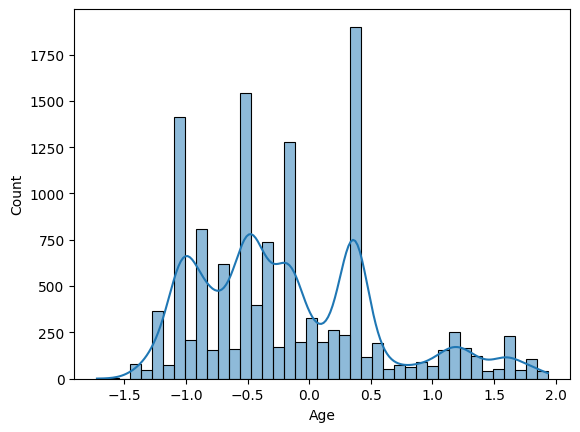

In [52]:
sns.histplot(train['Age'], kde=True)
plt.show()

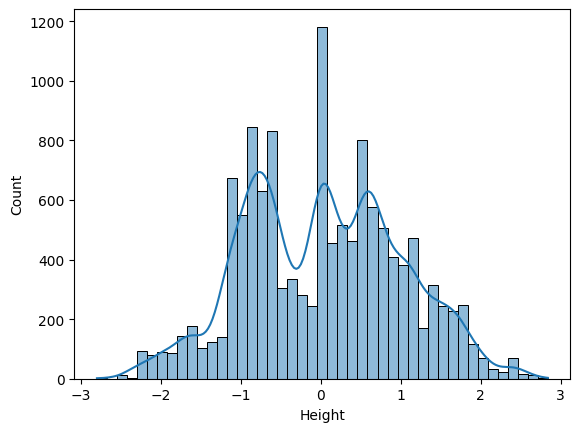

In [53]:
sns.histplot(train['Height'], kde=True)
plt.show()

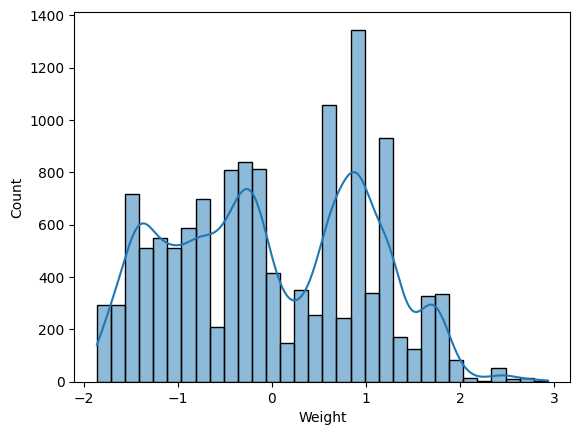

In [54]:
sns.histplot(train['Weight'], kde=True)
plt.show()

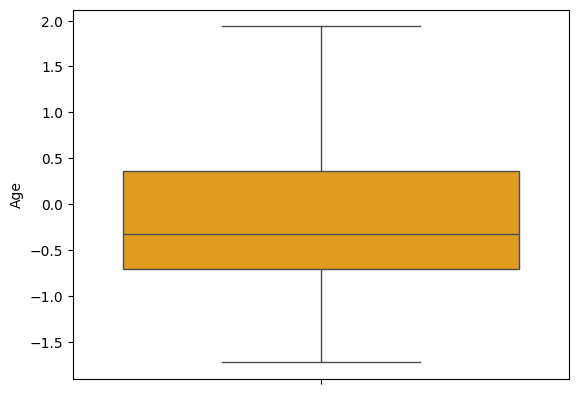

In [55]:
sns.boxplot(y=train['Age'], color='orange')
plt.show()

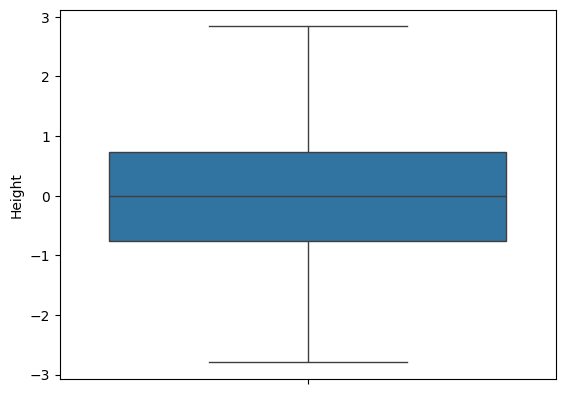

In [56]:
sns.boxplot(y=train['Height'])
plt.show()

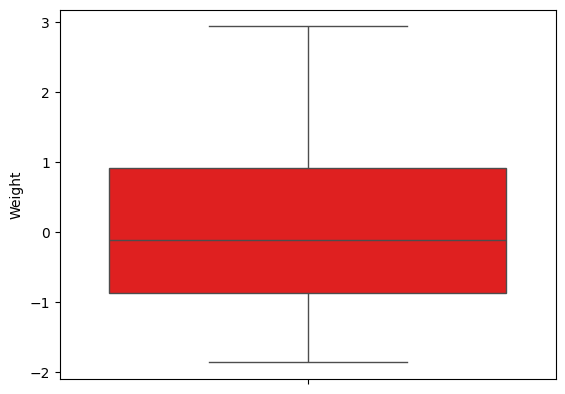

In [57]:
sns.boxplot(y=train['Weight'], color='red')
plt.show()

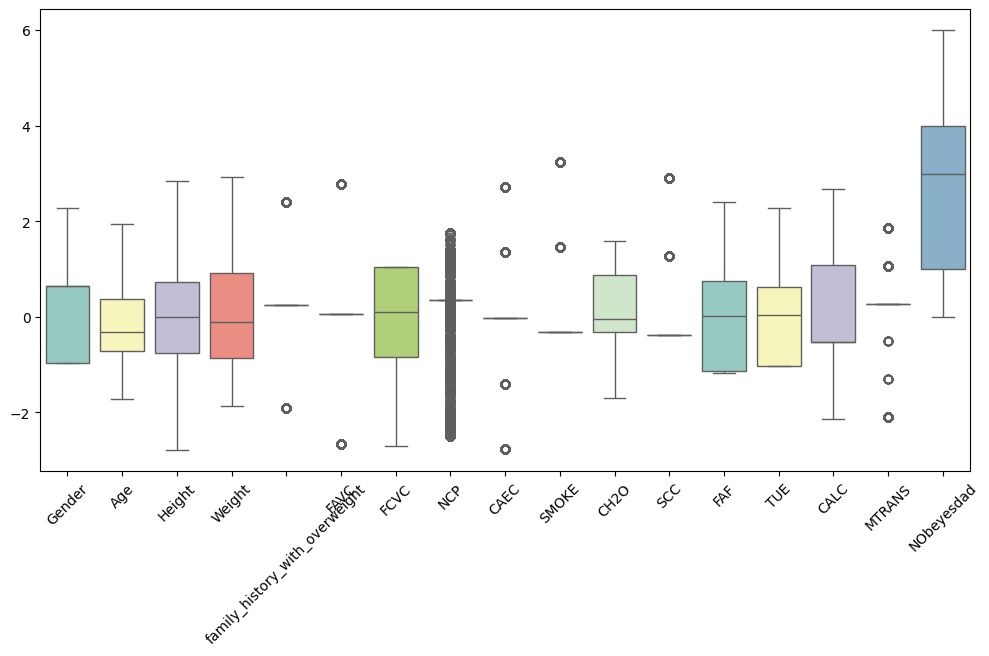

In [58]:
num_cols_all = train.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(12,6))
sns.boxplot(data=train[num_cols_all], palette='Set3')
plt.xticks(rotation=45)
plt.show()

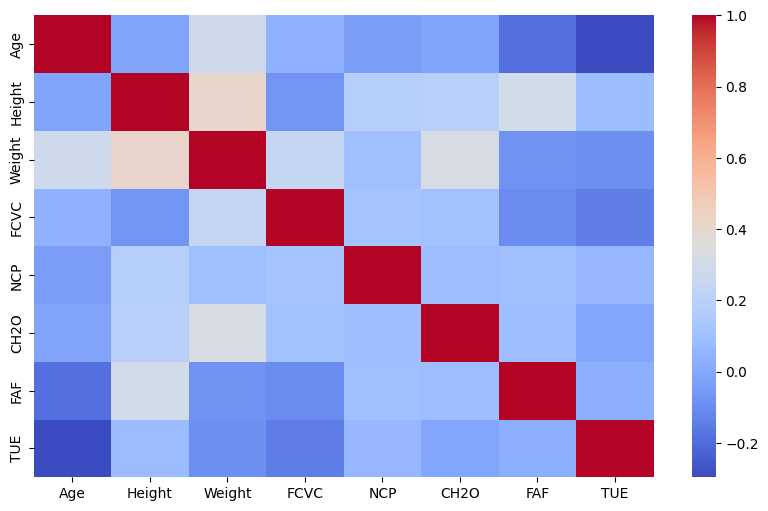

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(train.select_dtypes(include=['float64','int64']).corr(), cmap='coolwarm')
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in train.select_dtypes(include="object").columns:
    if col != "NObeyesdad":
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])
        le_dict[col] = le

target_le = LabelEncoder()
train["NObeyesdad"] = target_le.fit_transform(train["NObeyesdad"])

In [60]:

from sklearn.preprocessing import StandardScaler

num_cols = train.select_dtypes(include=['float64','int64']).columns.drop("NObeyesdad")
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [61]:
from sklearn.model_selection import train_test_split

X = train.drop("NObeyesdad", axis=1)
y = train["NObeyesdad"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = rf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.9165390505359877


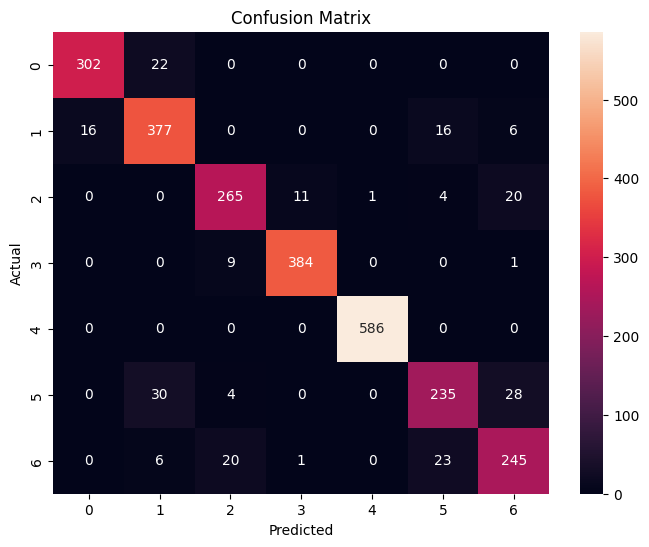

In [64]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators': [100,200,300],
    'max_depth': [5,10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True,False]
}

In [66]:
rs = RandomizedSearchCV(
    rf,
    param_distributions=params,
    n_iter=20, cv=3,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42)

rs.fit(X_train, y_train)
best_model = rs.best_estimator_

In [67]:
test_fixed = test.drop("id", axis=1)
test_pred = best_model.predict(test_fixed)
test_pred_original = target_le.inverse_transform(test_pred)

In [68]:
submission = pd.DataFrame({"ID": test["id"], "NObeyesdad": test_pred_original})
submission.to_csv("submission.csv", index=False)
print("submission.csv saved")

submission.csv saved
